In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# Résolution du minimum de la fonctionnelle

$$ E(u)=\frac{1}{2} x^T A x - b^T x $$
$$ $$
$$ \nabla E(u) =  Ax - b $$
$$ $$
avec $$ A = \begin{pmatrix} \lambda_1 & 0 \\ 0 & \lambda_2 \end{pmatrix} $$ 

## Méthode de la descente du gradient

In [4]:
#Valeurs propres
l1= 1
l2= -1
l=np.array([l1,l2])

#Matrice et vecteur pour fonction à minimiser
A=np.diag(l)
b=np.zeros(2)

#Norme du gradient
def norm_grad(diff_fonc,a) : return np.sqrt(np.dot(df(a), df(a)))

#Algorithme de descente du gradient (taux de convergence a = 0.01 et seuil eps = 10^(-10))
def descente(fonc, diff_fonc, a, alpha=1e-2, eps=1e-10) :
    gradf = norm_grad(df, a)
    i=0
    
    while abs(gradf)>eps:
        i=i+1
        gradf = norm_grad(df, a)
        a=a-alpha*df(a)
    
    return a, i

#Fonction et Gradient
def f(x)  : return 1/2 * np.dot(x, np.dot(A,x)) - np.dot(b, x)
def df(x) : return np.dot(A,x) - b

#Application de la descente du gradient pour la fonction définie ci dessus
descente(f,df,np.ones(2))

<ipython-input-4-2188bda1d853>:21: RuntimeWarning: overflow encountered in subtract
  a=a-alpha*df(a)


(array([nan, inf]), 71334)

## Représentation graphique

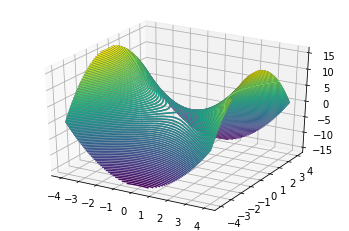

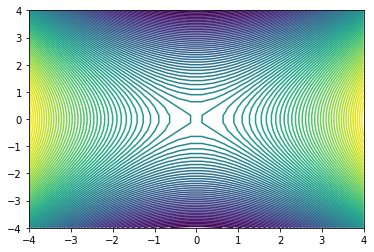

In [5]:
#Initialisation du graphe en 3D
fig=plt.figure()
ax=plt.axes(projection="3d")

#Fonction
def g(x,y) : return l1*x**2+l2*y**2

#Discrétisation en abscisses et ordonnées
x = np.linspace(-4, 4, 30)
y = np.linspace(-4, 4, 30)

#Création des différents points
X, Y = np.meshgrid(x,y)

#Calcul de la fonction à partir de tous les points
Z=g(X,Y)

#Tracé de la surface (fonction) et de la courbe de niveau
nb_cn = 100
ax.contour3D(X,Y,Z,nb_cn,cmap='binary')
plt.contour(X,Y,Z,nb_cn)
plt.show()
plt.contour(X,Y,Z,nb_cn)

#Noms des axes
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

#Point de vue de la figure (arg1 : rotation pour voir dessus, arg2 : rotation pour voir côtés)
ax.view_init(10,40)